## Dataset:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/content


In [3]:
!ls

sample_data


In [9]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [12]:
df.shape

(50000, 2)

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df = df.head(100)

In [15]:
df.shape

(100, 2)

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# lower case

In [17]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [18]:
df['review'] = df['review'].str.lower()

In [19]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
95,daniel day-lewis is the most versatile actor a...,positive
96,my guess would be this was originally going to...,negative
97,"well, i like to watch bad horror b-movies, cau...",negative
98,"this is the worst movie i have ever seen, as w...",negative


In [20]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

# remove_html_tags

In [21]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# **note: let we create a text**

In [22]:
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [23]:
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

In [24]:
df['review'] = df['review'].apply(remove_html_tags)

In [25]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

# remove_url

In [26]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

# **note:2 let create a URL text**

In [27]:
text1 = 'Check out my youtube https://www.youtube.com/dswithbappy dswithbappy'
text2 = 'Check out my linkedin https://www.linkedin.com/in/boktiarahmed73/'
text3 = 'Google search here www.google.com'
text4 = 'For data click https://www.kaggle.com/'

In [28]:
remove_url(text2)

'Check out my linkedin '

# punctuation handling

In [36]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text


In [38]:
text = 'string. With. Punctuation?'

In [40]:
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*50000)

string With Punctuation
31.01825714111328


# **Another approach to remove the punctuation**

In [41]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [42]:
start = time.time()
remove_punc1(text)
time2 = time.time() - start
print(time2*50000)

7.319450378417969


In [43]:
time1/time2

4.237785016286645

In [44]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [45]:
remove_punc1(df['review'][5])

'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

# chat_conversion handle

In [46]:
chat_words = {
    'AFAIK':'As Far As I Know',
    'AFK':'Away From Keyboard',
    'ASAP':'As Soon As Possible'
}


{
    "FYI": "For Your Information",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "OMG": "Oh My God",
    "IMO": "In My Opinion",
    "LOL": "Laugh Out Loud",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "TTYT": "Talk To You Tomorrow",
    "IDK": "I Don't Know",
    "TMI": "Too Much Information",
    "IMHO": "In My Humble Opinion",
    "ICYMI": "In Case You Missed It",
    "AFAIK": "As Far As I Know",
    "BTW": "By The Way",
    "FAQ": "Frequently Asked Questions",
    "TGIF": "Thank God It's Friday",
    "FYA": "For Your Action",
    "ICYMI": "In Case You Missed It",
}


{'FYI': 'For Your Information',
 'ASAP': 'As Soon As Possible',
 'BRB': 'Be Right Back',
 'BTW': 'By The Way',
 'OMG': 'Oh My God',
 'IMO': 'In My Opinion',
 'LOL': 'Laugh Out Loud',
 'TTYL': 'Talk To You Later',
 'GTG': 'Got To Go',
 'TTYT': 'Talk To You Tomorrow',
 'IDK': "I Don't Know",
 'TMI': 'Too Much Information',
 'IMHO': 'In My Humble Opinion',
 'ICYMI': 'In Case You Missed It',
 'AFAIK': 'As Far As I Know',
 'FAQ': 'Frequently Asked Questions',
 'TGIF': "Thank God It's Friday",
 'FYA': 'For Your Action'}

In [47]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

## **note:3 create a own text for chat_conversion**

In [48]:
chat_conversion('Do this work ASAP')

'Do this work As Soon As Possible'

# incorrect_text handling

In [49]:
from textblob import TextBlob

In [51]:
from typing import AnyStr

incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

ans = TextBlob(incorrect_text)

ans.correct().string

'certain conditions during several generations are modified in the same manner.'

# stopwords

In [52]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
len(stopwords.words('english'))

179

In [55]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

**note:4 create your own text**

In [56]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [57]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [58]:
df['review'].apply(remove_stopwords)

,review
0,one reviewers mentioned watching 1 oz e...
1,wonderful little production. filming techniq...
2,thought wonderful way spend time hot s...
3,basically there's family little boy (jake) ...
4,"petter mattei's ""love time money"" visuall..."
...,...
95,daniel day-lewis versatile actor alive. eng...
96,guess would originally going least two ...
97,"well, like watch bad horror b-movies, cause ..."
98,"worst movie ever seen, well as, worst ..."


# remove_emoji handle

In [59]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [60]:
remove_emoji("Loved the movie. It was 😘😘")

'Loved the movie. It was '

In [61]:
remove_emoji("Lmao 😂😂")

'Lmao '

# **EMOji to text conversion**

In [62]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.8 MB/s eta 0:00:00


In [63]:
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [64]:
print(emoji.demojize('Loved the movie. It was 😘'))

Loved the movie. It was :face_blowing_a_kiss:


# Tokenization

### 1. Using the split function

In [65]:
# word tokenization
sent1 = 'I am going to delhi'
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [66]:
# sentence tokenization
sent2 = 'I am going to delhi. I will stay there for 3 days. Let\'s hope the trip to be great'
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 3 days',
 " Let's hope the trip to be great"]

In [67]:
# Problems with split function
sent3 = 'I am going to delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

In [ ]:
sent4 = 'Where do think I should go? I have 3 day holiday'
sent4.split('.')

['Where do think I should go? I have 3 day holiday']

### 2. Regular Expression

In [68]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [69]:

text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry?
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""
sentences = re.compile('[.!?] ').split(text)
sentences

["Lorem Ipsum is simply dummy text of the printing and typesetting industry?\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

### 3. NLTK

In [72]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

sent1 = 'I am going to visit delhi!'
tokens = word_tokenize(sent1)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['I', 'am', 'going', 'to', 'visit', 'delhi', '!']


In [81]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry?
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [82]:
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

word_tokenize(sent5)

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']

In [83]:
word_tokenize(sent6)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

In [84]:
word_tokenize(sent7)

['A', '5km', 'ride', 'cost', '$', '10.50']

### 4. Spacy (good)

In [85]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [86]:
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)
doc4 = nlp(sent1)

In [87]:
doc4 = nlp(sent1)
doc4

I am going to visit delhi!

In [88]:
for token in doc4:
    print(token)

I
am
going
to
visit
delhi
!


In [89]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Stemmer

**Stemming is a natural language processing (NLP) technique that reduces a word to its base or root form. The root form may not always be a valid word, but it represents the word's core meaning.**

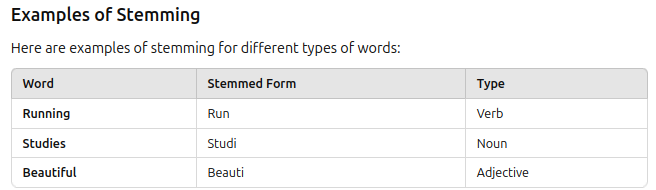

In [90]:
from nltk.stem.porter import PorterStemmer

In [91]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [92]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [93]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'
print(text)

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


In [94]:
stem_words(text)

'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

# Lemmatization

**Lemmatization is the process of converting a word to its base or root form,like turning "running" into "run" or "better" into "good."**


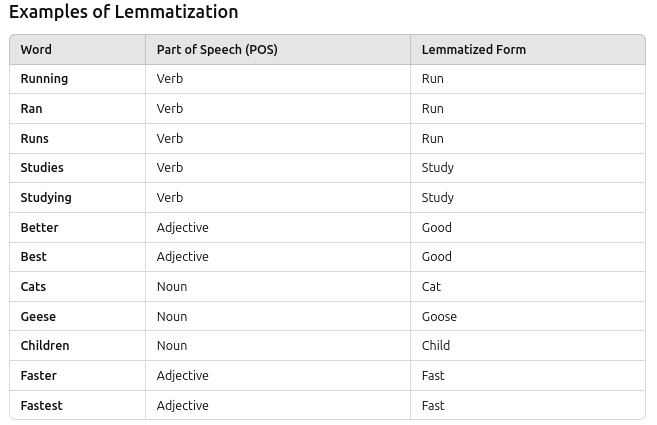

In [95]:
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


#### NOTE: Stemming & lemmatization are same to retrieve root words but lamatization is worked good. mmatization is slow & stemming is fast